In [2]:
%matplotlib inline
import glob
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image
from scipy.ndimage.filters import laplace
from scipy.ndimage import (gaussian_gradient_magnitude, sobel, binary_dilation, binary_erosion,
                           maximum_filter, gaussian_laplace)

In [3]:
dataset_root = '/net/people/plgmatisz/antibodies/data/original/'

## load images

In [14]:
%%time

images = {}
files = {}

for subdir in glob.glob(dataset_root + '/*'):
    category = subdir.split('/')[-1]
    
    print(category, subdir)
    files[category] = glob.glob(subdir + '/*')
    images[category] = [Image.open(f) for f in files[category]]

negatives /net/people/plgmatisz/antibodies/data/original/negatives
AMA /net/people/plgmatisz/antibodies/data/original/AMA
nucleolar /net/people/plgmatisz/antibodies/data/original/nucleolar
ziarnisty+homogenny /net/people/plgmatisz/antibodies/data/original/ziarnisty+homogenny
ACA /net/people/plgmatisz/antibodies/data/original/ACA
ziarnisty /net/people/plgmatisz/antibodies/data/original/ziarnisty
fibrilar /net/people/plgmatisz/antibodies/data/original/fibrilar
ziarnisty+nucleolar /net/people/plgmatisz/antibodies/data/original/ziarnisty+nucleolar
homogenous /net/people/plgmatisz/antibodies/data/original/homogenous
ziarnisty+cytoplazmatyczny /net/people/plgmatisz/antibodies/data/original/ziarnisty+cytoplazmatyczny
nuclear_dots /net/people/plgmatisz/antibodies/data/original/nuclear_dots
CPU times: user 573 ms, sys: 5.13 s, total: 5.71 s
Wall time: 40.4 s


In [15]:
for category, files_list in files.items():
    print(f'{category}: {len(files_list)}')

negatives: 180
AMA: 5
nucleolar: 16
ziarnisty+homogenny: 120
ACA: 57
ziarnisty: 492
fibrilar: 27
ziarnisty+nucleolar: 180
homogenous: 70
ziarnisty+cytoplazmatyczny: 40
nuclear_dots: 9


## display images

In [17]:
def display_batch(imgs, rows, cols, wh=None, **plot_kwargs):
    f, axes = plt.subplots(rows, cols)
    axes = axes.reshape(-1)
    
    if wh is not None:
        f.set_size_inches(wh)
    
    for img, a in zip(imgs, axes):
        a.imshow(img, **plot_kwargs)
        a.set_xticks([], [])
        a.set_yticks([], [])
        
    plt.show()

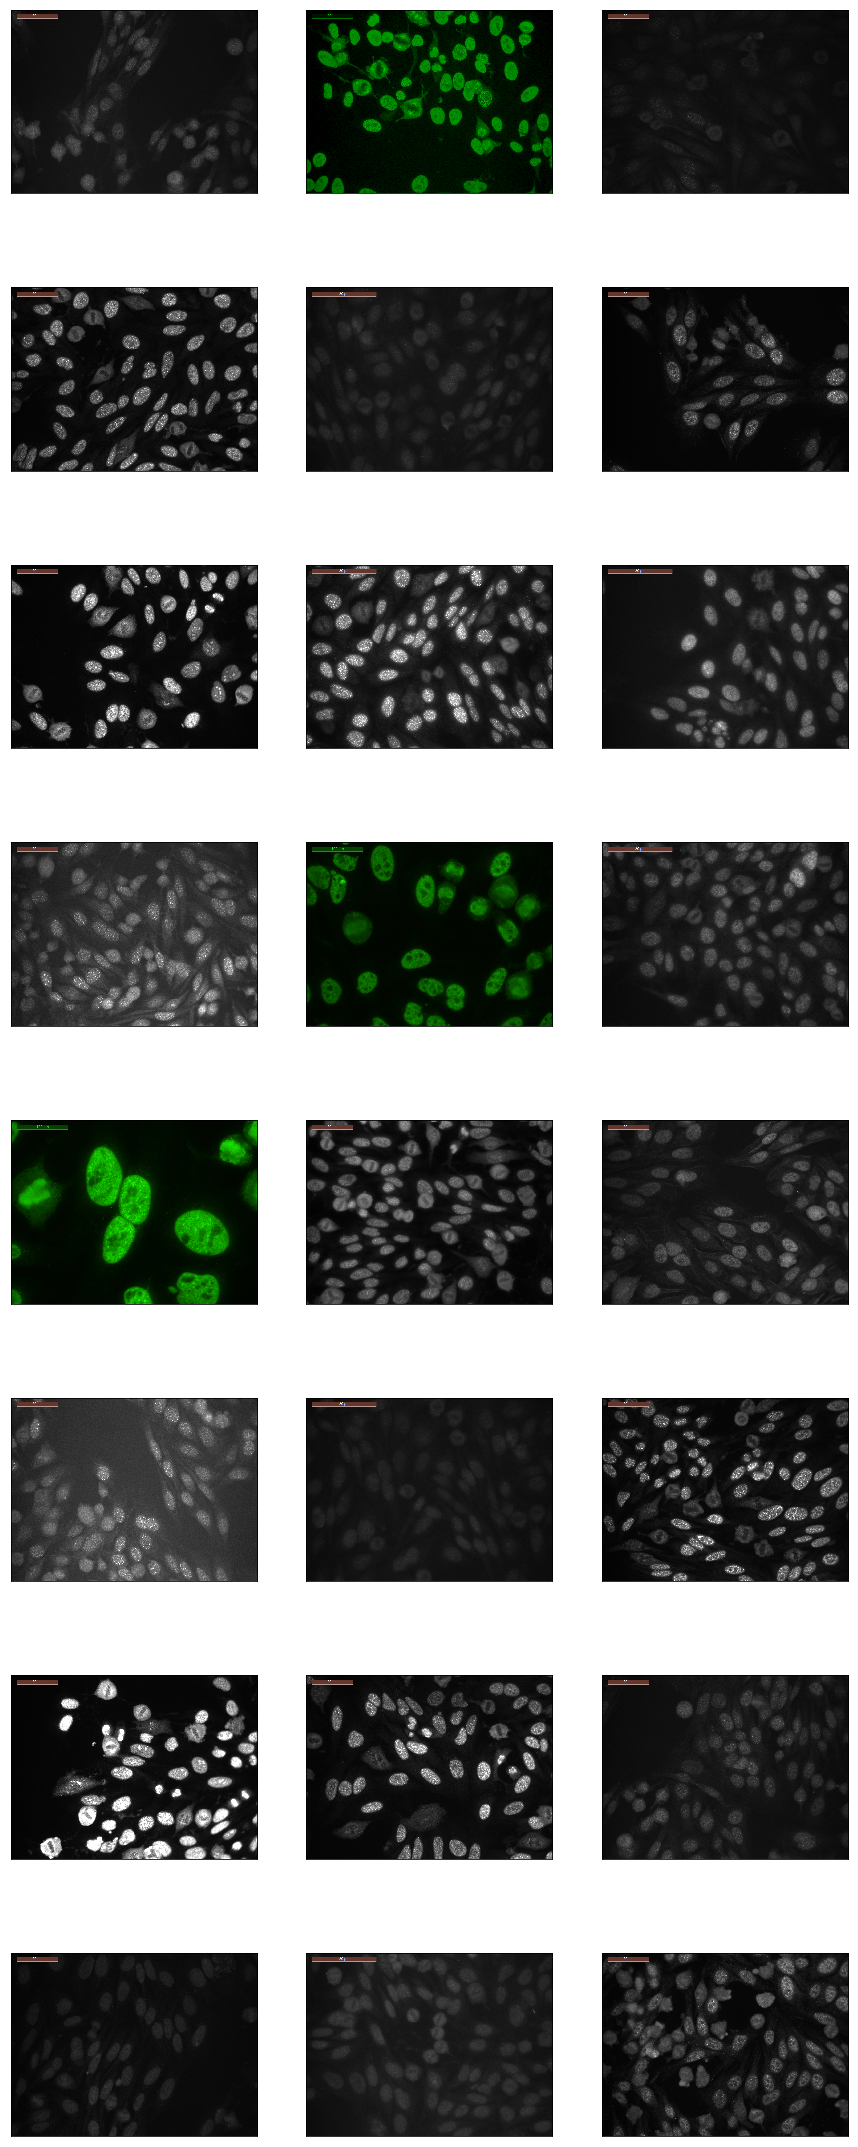

In [18]:
display_batch(images['ziarnisty'], rows=8, cols=3, wh=(15, 40))

## ACA category

In [54]:
aca_batch = loaded['ACA']

In [55]:
%%time
aca_gray = np.mean(aca_batch, axis=3)
print(aca_gray.shape)

(37, 600, 800)
CPU times: user 355 ms, sys: 46 µs, total: 355 ms
Wall time: 353 ms


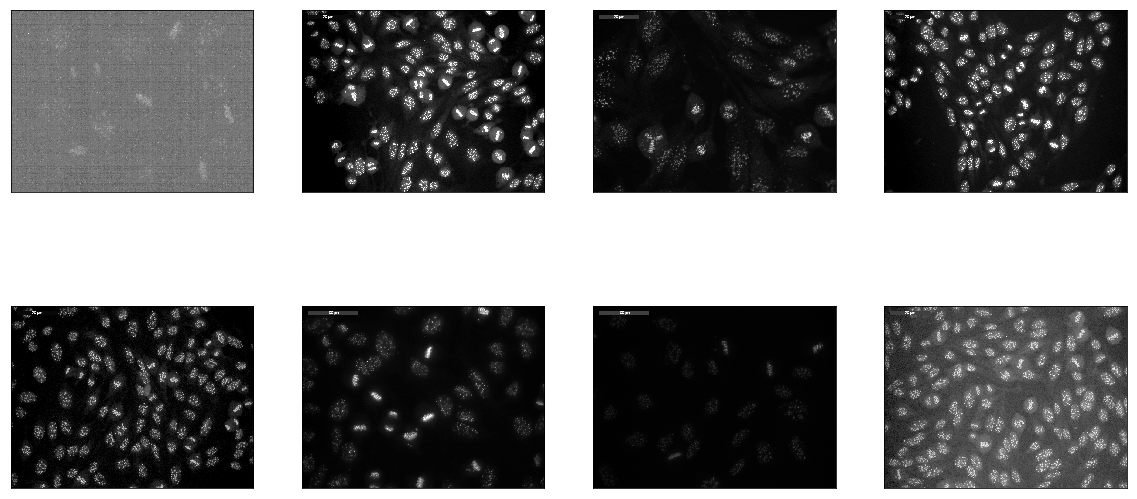

In [58]:
display_batch(aca_gray, rows=2, cols=4, wh=(20, 10), cmap='gray')